In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
import ast

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# survey data from drive files
survey_data = {
    'song_id' : [6636486] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.15, 0.10, 0.20, 0.05, 0.10, 0.05, 0.20, 0.15, 0.05, 0.10],
    'Joy': [0.10, 0.05, 0.05, 0.05, 0.15, 0.10, 0.05, 0.05, 0.10, 0.10],
    'Surprise': [0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.10, 0.10],
    'Anger': [0.30, 0.40, 0.25, 0.35, 0.25, 0.30, 0.25, 0.35, 0.30, 0.30],
    'Disgust': [0.10, 0.05, 0.10, 0.15, 0.05, 0.10, 0.10, 0.05, 0.05, 0.05],
    'Fear': [0.15, 0.10, 0.15, 0.10, 0.20, 0.15, 0.10, 0.10, 0.10, 0.10],
    'Sadness': [0.10, 0.20, 0.10, 0.10, 0.10, 0.15, 0.15, 0.15, 0.20, 0.15],
    'Trust': [0.05, 0.05, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]
}
survey_1 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [5955393] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.10, 0.10, 0.15, 0.05, 0.10, 0.05, 0.20, 0.05, 0.10, 0.15],
    'Joy': [0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05],
    'Surprise': [0.05, 0.05, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05],
    'Anger': [0.25, 0.25, 0.30, 0.35, 0.30, 0.35, 0.25, 0.30, 0.30, 0.30],
    'Disgust': [0.10, 0.05, 0.10, 0.15, 0.05, 0.10, 0.10, 0.05, 0.05, 0.05],
    'Fear': [0.20, 0.15, 0.15, 0.20, 0.25, 0.20, 0.20, 0.15, 0.20, 0.25],
    'Sadness': [0.20, 0.30, 0.25, 0.15, 0.20, 0.15, 0.25, 0.25, 0.25, 0.20],
    'Trust': [0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
}
survey_2 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [4191823] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.25, 0.30, 0.35, 0.30, 0.25, 0.20, 0.30, 0.35, 0.30, 0.25],
    'Joy': [0.15, 0.10, 0.15, 0.10, 0.10, 0.15, 0.10, 0.10, 0.15, 0.10],
    'Surprise': [0.20, 0.15, 0.20, 0.20, 0.15, 0.20, 0.25, 0.20, 0.15, 0.20],
    'Anger': [0.30, 0.35, 0.40, 0.35, 0.40, 0.35, 0.30, 0.40, 0.35, 0.30],
    'Disgust': [0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Fear': [0.15, 0.20, 0.15, 0.20, 0.15, 0.15, 0.20, 0.15, 0.20, 0.15],
    'Sadness': [0.05, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05],
    'Trust': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
}
survey_3 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [1062758] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.45, 0.40, 0.50, 0.55, 0.50, 0.45, 0.40, 0.50, 0.45, 0.50],
    'Joy': [0.35, 0.40, 0.35, 0.30, 0.35, 0.40, 0.40, 0.35, 0.35, 0.30],
    'Surprise': [0.05, 0.10, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.10, 0.05],
    'Anger': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Disgust': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Fear': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Sadness': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Trust': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25]
}
survey_4 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [7402191] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.55, 0.60, 0.50, 0.45, 0.50, 0.55, 0.60, 0.50, 0.45, 0.50],
    'Joy': [0.25, 0.20, 0.25, 0.30, 0.25, 0.20, 0.20, 0.25, 0.30, 0.25],
    'Surprise': [0.15, 0.10, 0.15, 0.15, 0.10, 0.15, 0.10, 0.15, 0.15, 0.10],
    'Anger': [0.60, 0.55, 0.60, 0.65, 0.60, 0.55, 0.55, 0.60, 0.65, 0.60],
    'Disgust': [0.50, 0.45, 0.50, 0.55, 0.50, 0.45, 0.45, 0.50, 0.55, 0.50],
    'Fear': [0.35, 0.30, 0.35, 0.40, 0.35, 0.30, 0.30, 0.35, 0.40, 0.35],
    'Sadness': [0.30, 0.25, 0.30, 0.35, 0.30, 0.25, 0.25, 0.30, 0.35, 0.30],
    'Trust': [0.20, 0.15, 0.20, 0.25, 0.20, 0.15, 0.15, 0.20, 0.25, 0.20]
}
survey_5 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [6047243] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.25, 0.20, 0.15, 0.25, 0.20, 0.30, 0.20, 0.25, 0.30, 0.20],
    'Joy': [0.10, 0.05, 0.15, 0.10, 0.05, 0.10, 0.05, 0.10, 0.05, 0.05],
    'Surprise': [0.05, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05],
    'Anger': [0.50, 0.55, 0.50, 0.55, 0.60, 0.55, 0.50, 0.55, 0.60, 0.55],
    'Disgust': [0.35, 0.40, 0.35, 0.40, 0.45, 0.40, 0.35, 0.40, 0.45, 0.40],
    'Fear': [0.60, 0.55, 0.60, 0.65, 0.60, 0.65, 0.60, 0.65, 0.60, 0.65],
    'Sadness': [0.70, 0.75, 0.70, 0.75, 0.80, 0.75, 0.70, 0.75, 0.80, 0.75],
    'Trust': [0.15, 0.10, 0.15, 0.10, 0.05, 0.10, 0.15, 0.10, 0.05, 0.10]
}
survey_6 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [4313071] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.25, 0.20, 0.30, 0.20, 0.25, 0.30, 0.25, 0.20, 0.15, 0.25],
    'Joy': [0.20, 0.30, 0.25, 0.30, 0.25, 0.20, 0.15, 0.20, 0.30, 0.25],
    'Surprise': [0.10, 0.10, 0.05, 0.10, 0.10, 0.10, 0.05, 0.10, 0.10, 0.05],
    'Anger': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05],
    'Disgust': [0.05, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05],
    'Fear': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05],
    'Sadness': [0.20, 0.20, 0.20, 0.15, 0.20, 0.15, 0.15, 0.20, 0.15, 0.15],
    'Trust': [0.10, 0.05, 0.05, 0.05, 0.10, 0.05, 0.10, 0.05, 0.10, 0.10]
}
survey_7 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [6850734] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.20, 0.25, 0.20, 0.30, 0.25, 0.20, 0.15, 0.25, 0.20, 0.20],
    'Joy': [0.15, 0.10, 0.15, 0.20, 0.10, 0.15, 0.20, 0.15, 0.10, 0.15],
    'Surprise': [0.10, 0.15, 0.10, 0.05, 0.15, 0.10, 0.10, 0.10, 0.15, 0.10],
    'Anger': [0.05, 0.05, 0.05, 0.10, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05],
    'Disgust': [0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.10, 0.05],
    'Fear': [0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.10],
    'Sadness': [0.20, 0.15, 0.20, 0.15, 0.20, 0.15, 0.20, 0.20, 0.20, 0.15],
    'Trust': [0.20, 0.15, 0.15, 0.10, 0.15, 0.15, 0.15, 0.15, 0.15, 0.20]
}
survey_8 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [6736901] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
    'Joy': [0.01, 0.00, 0.00, 0.01, 0.00, 0.01, 0.00, 0.00, 0.01, 0.00],
    'Surprise': [0.05, 0.10, 0.05, 0.00, 0.00, 0.05, 0.05, 0.10, 0.05, 0.05],
    'Anger': [0.10, 0.15, 0.20, 0.15, 0.10, 0.10, 0.15, 0.15, 0.10, 0.15],
    'Disgust': [0.20, 0.25, 0.20, 0.30, 0.20, 0.25, 0.20, 0.20, 0.25, 0.20],
    'Fear': [0.25, 0.20, 0.25, 0.25, 0.30, 0.30, 0.25, 0.20, 0.25, 0.25],
    'Sadness': [0.30, 0.25, 0.25, 0.25, 0.30, 0.25, 0.30, 0.25, 0.25, 0.25],
    'Trust': [0.04, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.00, 0.00]
}
survey_9 = pd.DataFrame(survey_data)

survey_data = {
    'song_id': [6184434] * 10,
    'Participant': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Anticipation': [0.10, 0.15, 0.10, 0.10, 0.15, 0.10, 0.15, 0.10, 0.15, 0.10],
    'Joy': [0.05, 0.00, 0.05, 0.00, 0.00, 0.05, 0.00, 0.05, 0.00, 0.05],
    'Surprise': [0.10, 0.05, 0.05, 0.10, 0.10, 0.05, 0.05, 0.10, 0.05, 0.05],
    'Anger': [0.20, 0.25, 0.30, 0.20, 0.25, 0.20, 0.25, 0.25, 0.20, 0.20],
    'Disgust': [0.05, 0.05, 0.05, 0.05, 0.05, 0.10, 0.05, 0.05, 0.05, 0.05],
    'Fear': [0.25, 0.20, 0.25, 0.30, 0.25, 0.25, 0.20, 0.20, 0.25, 0.25],
    'Sadness': [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
    'Trust': [0.00, 0.05, 0.00, 0.10, 0.10, 0.05, 0.05, 0.05, 0.10, 0.05]
}
survey_10 = pd.DataFrame(survey_data)

survey_df = pd.concat([survey_1, survey_2, survey_3, survey_4, survey_5,
                      survey_6, survey_7, survey_8, survey_9, survey_10],
                     ignore_index=True)

# process survey data from google drive
aggregated_df = survey_df.drop('Participant', axis=1).groupby('song_id').mean().reset_index()
emotions = ['Anticipation', 'Joy', 'Surprise', 'Anger', 'Disgust', 'Fear', 'Sadness', 'Trust']
aggregated_df[emotions] = aggregated_df[emotions].div(aggregated_df[emotions].sum(axis=1), axis=0)
survey_df = aggregated_df.sort_values(by='song_id').reset_index()

# list of song ids in survey data
list_of_song_ids = survey_df['song_id'].unique().tolist()

# load and process emotion data
emotion_df = pd.read_csv('/content/drive/MyDrive/CS410 Final Project/code/emotion_assigned_songs.csv')
emotion_df = emotion_df[emotion_df['song_id'].isin(list_of_song_ids)].reset_index()

def convert_defaultdict_string(s):
    dict_string = s.replace("defaultdict(<class 'int'>, ", "").strip("()")
    return ast.literal_eval(dict_string)

emotion_df['emotion_distribution'] = emotion_df['emotion_distribution'].apply(convert_defaultdict_string)

# result df with emotion distributions
emotions = ['anticipation', 'joy', 'surprise', 'anger', 'disgust', 'fear', 'sadness', 'trust']
result_df = pd.DataFrame()
result_df['song_id'] = emotion_df['song_id']
# align dfs with title and artist
result_df['title'] = emotion_df['title']
result_df['artist'] = emotion_df['artist']
for emotion in emotions:
    result_df[emotion.capitalize()] = emotion_df['emotion_distribution'].apply(lambda x: x.get(emotion, 0))

emotion_df = result_df.sort_values(by='song_id').reset_index(drop=True)

# user input for emotions
input_distribution = {}
for emotion in emotions:
    user_input = input(f"From 1-10, how {emotion.lower()} are you feeling?: ")
    input_distribution[emotion] = int(user_input)

total = sum(input_distribution.values())
input_distribution = {emotion: score / total for emotion, score in input_distribution.items()}

def get_emotion_vector_from_list(emotion_dict, emotion_list):
    return [emotion_dict.get(emotion, 0) for emotion in emotion_list]

# calculate similarities
input_vector = get_emotion_vector_from_list(input_distribution, emotions)
emotion_vectors = emotion_df[['Anticipation', 'Joy', 'Surprise', 'Anger', 'Disgust', 'Fear', 'Sadness', 'Trust']].values
input_vector = np.array(input_vector).reshape(1, -1)
cosine_similarities = cosine_similarity(input_vector, emotion_vectors).flatten()
emotion_df['cosine_similarity'] = cosine_similarities

# recommendations
top_n = 10
recommended_df = emotion_df.nlargest(top_n, 'cosine_similarity')[
    ['song_id', 'title', 'artist', 'cosine_similarity']
].reset_index(drop=True)

# print rec results
print("\n" + "-" * 50 + "\n")
print("Top 10 Songs Based on Similarity:")
for idx, row in recommended_df.iterrows():
    print(f"{idx + 1}. {row['title']} by {row['artist']} (Song ID: {row['song_id']}) - Similarity: {row['cosine_similarity']:.4f}")

# evaluation
def kl_divergence(p, q):
    epsilon = 1e-10
    p = np.array(p) + epsilon
    q = np.array(q) + epsilon
    return np.sum(p * np.log(p / q))

# column names match
emotions_lowercase = [e.lower() for e in emotions]
survey_df.columns = survey_df.columns.str.lower()
emotion_df.columns = emotion_df.columns.str.lower()

# filter so only recommended songs
recommended_song_ids = recommended_df['song_id']
evaluation_survey_df = survey_df[survey_df['song_id'].isin(recommended_song_ids)]
evaluation_emotion_df = emotion_df[emotion_df['song_id'].isin(recommended_song_ids)]

# sort for alignment
evaluation_survey_df = evaluation_survey_df.sort_values(by='song_id').reset_index(drop=True)
evaluation_emotion_df = evaluation_emotion_df.sort_values(by='song_id').reset_index(drop=True)

# metrics
evaluation_results = []
for i, row in evaluation_survey_df.iterrows():
    song_id = row['song_id']
    true_distribution = row[emotions_lowercase].values
    predicted_row = evaluation_emotion_df[evaluation_emotion_df['song_id'] == song_id]

    if not predicted_row.empty:
        predicted_distribution = predicted_row[emotions_lowercase].values.flatten()
    else:
        predicted_distribution = np.zeros_like(true_distribution)

    kl_div = kl_divergence(true_distribution, predicted_distribution)
    cosine_sim = cosine_similarity([true_distribution], [predicted_distribution])[0][0]

    song_details = recommended_df[recommended_df['song_id'] == song_id].iloc[0]

    evaluation_results.append({
        'song_id': song_id,
        'title': song_details['title'],
        'artist': song_details['artist'],
        'KL_Divergence': kl_div,
        'Cosine_Similarity': cosine_sim
    })

evaluation_df = pd.DataFrame(evaluation_results).sort_values(by='Cosine_Similarity', ascending=False)

# eval results
print("\n--- Evaluation of Recommendation System ---\n")
print("Evaluation Metrics for Recommended Songs:\n")
for idx, row in evaluation_df.iterrows():
    print(f"{idx + 1}. {row['title']} by {row['artist']} (Song ID: {row['song_id']})")
    print(f"   KL Divergence: {row['KL_Divergence']:.4f}, Cosine Similarity: {row['Cosine_Similarity']:.4f}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


From 1-10, how anticipation are you feeling?: 1
From 1-10, how joy are you feeling?: 2
From 1-10, how surprise are you feeling?: 3
From 1-10, how anger are you feeling?: 4
From 1-10, how disgust are you feeling?: 5
From 1-10, how fear are you feeling?: 6
From 1-10, how sadness are you feeling?: 7
From 1-10, how trust are you feeling?: 8

--------------------------------------------------

Top 10 Songs Based on Similarity:
1. ​t r a n s p a r e n t s o u l Remix by WILLOW (Song ID: 7402191) - Similarity: 0.9232
2. Waste by Naevus (Song ID: 5955393) - Similarity: 0.9001
3. ​finale by ericdoa (Song ID: 6636486) - Similarity: 0.8834
4. Super-Sonic by Jubilee Valley (Song ID: 4313071) - Similarity: 0.8578
5. Cold Turkey Take 1 by John Lennon (Song ID: 6736901) - Similarity: 0.8466
6. Roaring Lion by Craig Xen (Song ID: 6184434) - Similarity: 0.8324
7. Pressure by Willie Waters (Song ID: 4191823) - Similarity: 0.7970
8. Girl at the Party by Different Boats (Song ID: 6850734) - Similarity: 0.

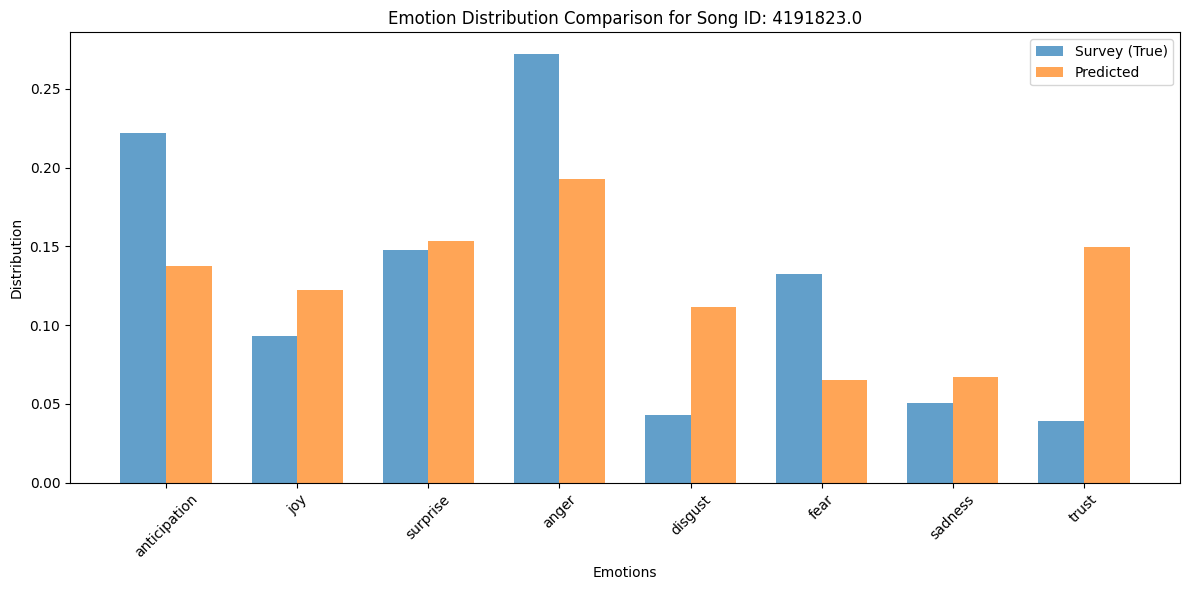

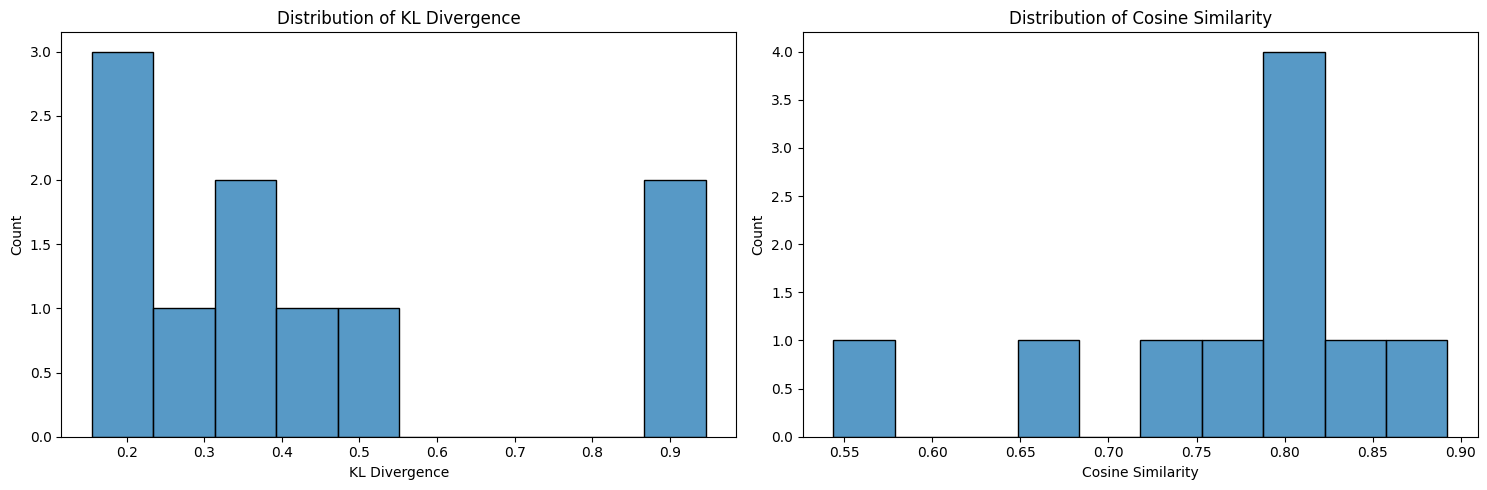

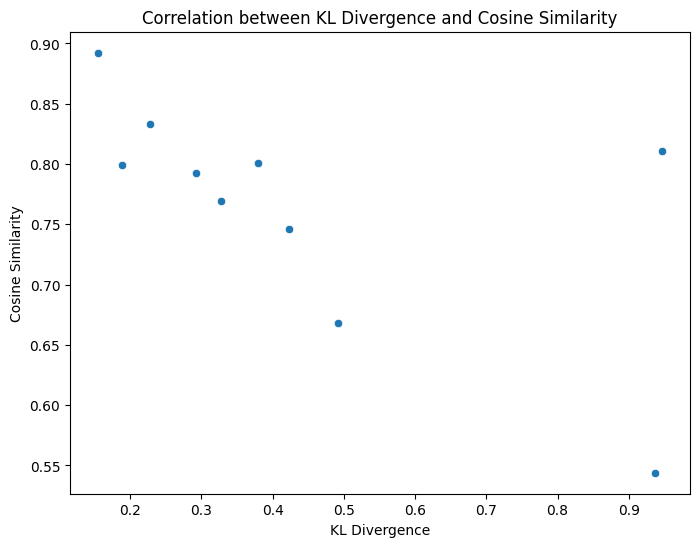

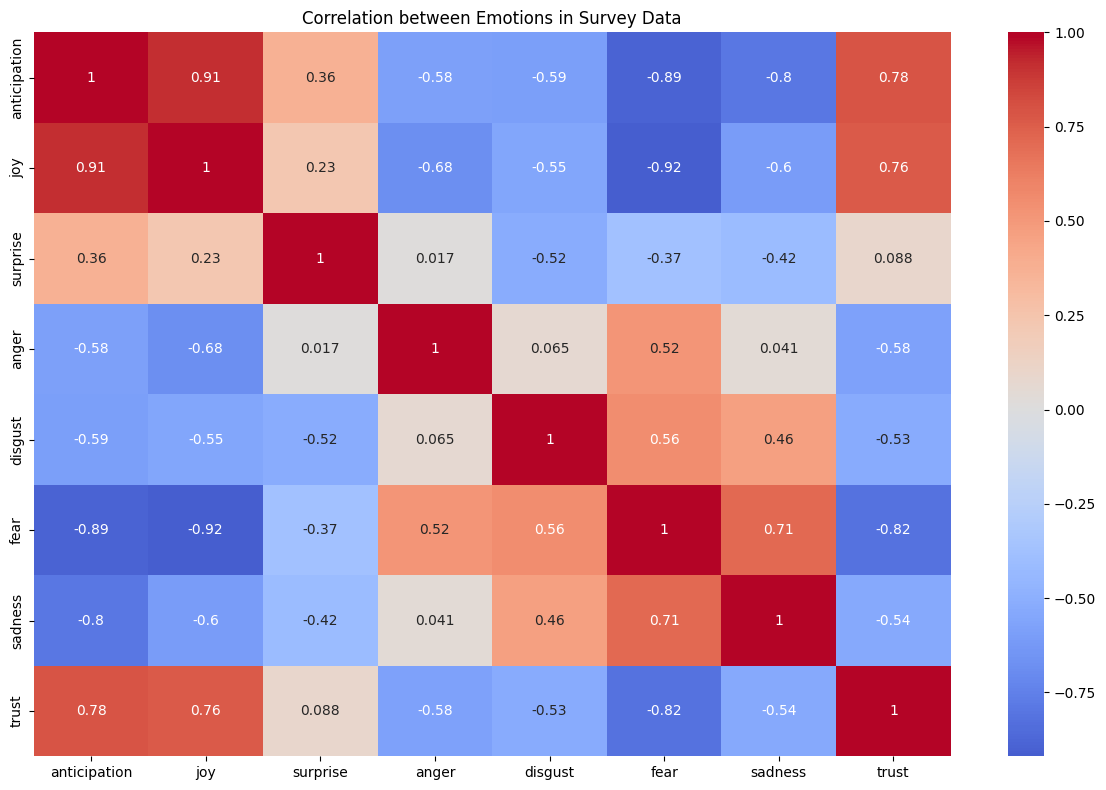

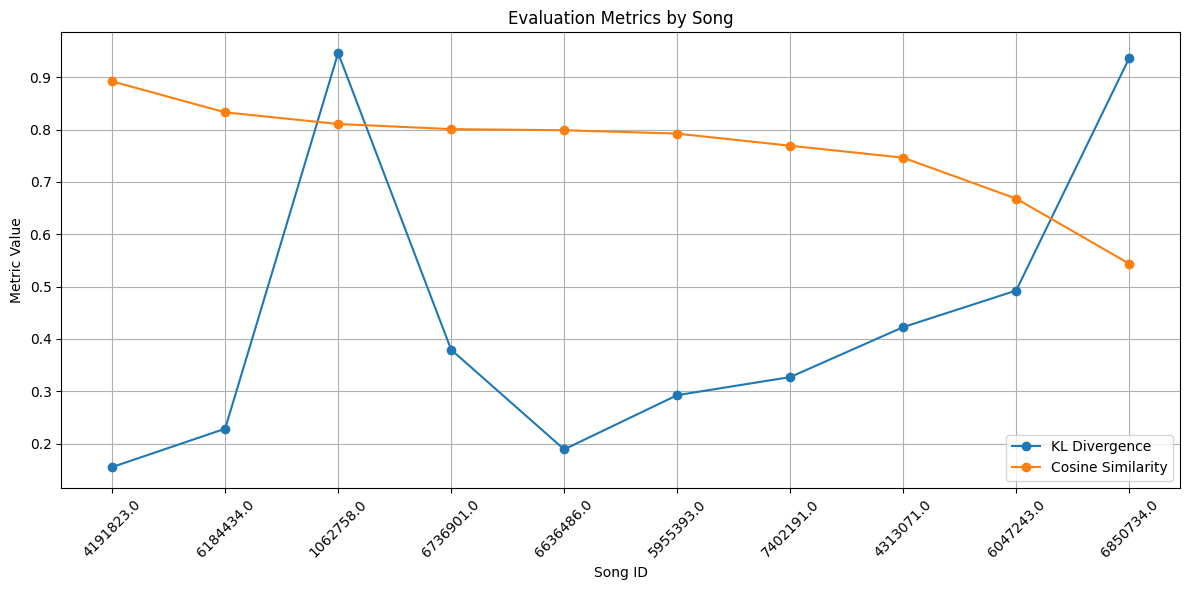

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import plotly.express as px
import plotly.graph_objects as go

# Emotion Distribution Comparison
def plot_emotion_comparison(evaluation_survey_df, evaluation_emotion_df, song_id):
    """Plot predicted vs actual emotion distributions for a specific song"""
    plt.figure(figsize=(12, 6))

    # Get the song's data
    true_dist = evaluation_survey_df[evaluation_survey_df['song_id'] == song_id].iloc[0]
    pred_dist = evaluation_emotion_df[evaluation_emotion_df['song_id'] == song_id].iloc[0]

    # Get emotions (excluding song_id and index)
    emotions = [col for col in true_dist.index if col not in ['song_id', 'index']]

    # Create bar positions
    x = np.arange(len(emotions))
    width = 0.35

    # Create bars
    plt.bar(x - width/2, [true_dist[e] for e in emotions], width, label='Survey (True)', alpha=0.7)
    plt.bar(x + width/2, [pred_dist[e] for e in emotions], width, label='Predicted', alpha=0.7)

    plt.xlabel('Emotions')
    plt.ylabel('Distribution')
    plt.title(f'Emotion Distribution Comparison for Song ID: {song_id}')
    plt.xticks(x, emotions, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Evaluation Metrics Distribution
def plot_evaluation_metrics(evaluation_df):
    """Plot distribution of evaluation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # KL Divergence distribution
    sns.histplot(data=evaluation_df, x='KL_Divergence', bins=10, ax=ax1)
    ax1.set_title('Distribution of KL Divergence')
    ax1.set_xlabel('KL Divergence')

    # Cosine Similarity distribution
    sns.histplot(data=evaluation_df, x='Cosine_Similarity', bins=10, ax=ax2)
    ax2.set_title('Distribution of Cosine Similarity')
    ax2.set_xlabel('Cosine Similarity')

    plt.tight_layout()
    plt.show()

# Metrics Correlation Plot
def plot_metrics_correlation(evaluation_df):
    """Plot correlation between KL Divergence and Cosine Similarity"""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=evaluation_df, x='KL_Divergence', y='Cosine_Similarity')
    plt.title('Correlation between KL Divergence and Cosine Similarity')
    plt.xlabel('KL Divergence')
    plt.ylabel('Cosine Similarity')
    plt.show()

# Emotion Distribution Heatmap
def plot_emotion_heatmap(evaluation_survey_df):
    """Plot heatmap of emotions across all evaluated songs"""
    # Get emotion columns
    emotion_cols = [col for col in evaluation_survey_df.columns
                   if col not in ['song_id', 'index']]

    plt.figure(figsize=(12, 8))
    sns.heatmap(evaluation_survey_df[emotion_cols].corr(),
                annot=True,
                cmap='coolwarm',
                center=0)
    plt.title('Correlation between Emotions in Survey Data')
    plt.tight_layout()
    plt.show()

# Performance Over Songs
def plot_performance_by_song(evaluation_df):
    """Plot evaluation metrics for each song"""
    plt.figure(figsize=(12, 6))

    x = range(len(evaluation_df))
    plt.plot(x, evaluation_df['KL_Divergence'], 'o-', label='KL Divergence')
    plt.plot(x, evaluation_df['Cosine_Similarity'], 'o-', label='Cosine Similarity')

    plt.xticks(x, evaluation_df['song_id'], rotation=45)
    plt.xlabel('Song ID')
    plt.ylabel('Metric Value')
    plt.title('Evaluation Metrics by Song')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Radar Chart for Emotion Profiles
def plot_emotion_radar(evaluation_survey_df, evaluation_emotion_df, song_id):
    """Create a radar chart comparing predicted vs actual emotion distributions"""
    # Get the song's data
    true_dist = evaluation_survey_df[evaluation_survey_df['song_id'] == song_id].iloc[0]
    pred_dist = evaluation_emotion_df[evaluation_emotion_df['song_id'] == song_id].iloc[0]

    # Get emotions (excluding song_id and index)
    emotions = [col for col in true_dist.index if col not in ['song_id', 'index']]

    # Create the radar chart
    fig = go.Figure()

    # Add true distribution
    fig.add_trace(go.Scatterpolar(
        r=[true_dist[e] for e in emotions],
        theta=emotions,
        fill='toself',
        name='Survey (True)'
    ))

    # Add predicted distribution
    fig.add_trace(go.Scatterpolar(
        r=[pred_dist[e] for e in emotions],
        theta=emotions,
        fill='toself',
        name='Predicted'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1]
            )),
        showlegend=True,
        title=f'Emotion Profile Comparison for Song ID: {song_id}'
    )

    fig.show()

# Example usage of all visualizations:
"""
# After running your recommendation and evaluation system:

# 1. Compare distributions for a specific song
plot_emotion_comparison(evaluation_survey_df, evaluation_emotion_df, song_id=YOUR_SONG_ID)

# 2. Show distribution of evaluation metrics
plot_evaluation_metrics(evaluation_df)

# 3. Show correlation between metrics
plot_metrics_correlation(evaluation_df)

# 4. Show emotion correlations
plot_emotion_heatmap(evaluation_survey_df)

# 5. Show performance across songs
plot_performance_by_song(evaluation_df)

# 6. Show radar chart for a specific song
plot_emotion_radar(evaluation_survey_df, evaluation_emotion_df, song_id=YOUR_SONG_ID)
"""
# Choose a song ID from your evaluation results
song_id = evaluation_df['song_id'].iloc[0]

# Generate all visualizations
plot_emotion_comparison(evaluation_survey_df, evaluation_emotion_df, song_id)
plot_evaluation_metrics(evaluation_df)
plot_metrics_correlation(evaluation_df)
plot_emotion_heatmap(evaluation_survey_df)
plot_performance_by_song(evaluation_df)
plot_emotion_radar(evaluation_survey_df, evaluation_emotion_df, song_id)